<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1%201_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 1-Supervised Learning

όνομα:Ναταλία Ταμβακίδου
ΑΕΜ:200

#Μέρος 1-Λογιστική παλινδρόμηση

#Εισαγωγή Βιβλιοθηκών

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Φόρτωση-Εμφάνιση Δεδομένων

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Περιγραφή χαρακτηριστικών

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

#Γραφικές απεικονίσεις των χαρακτηριστικών


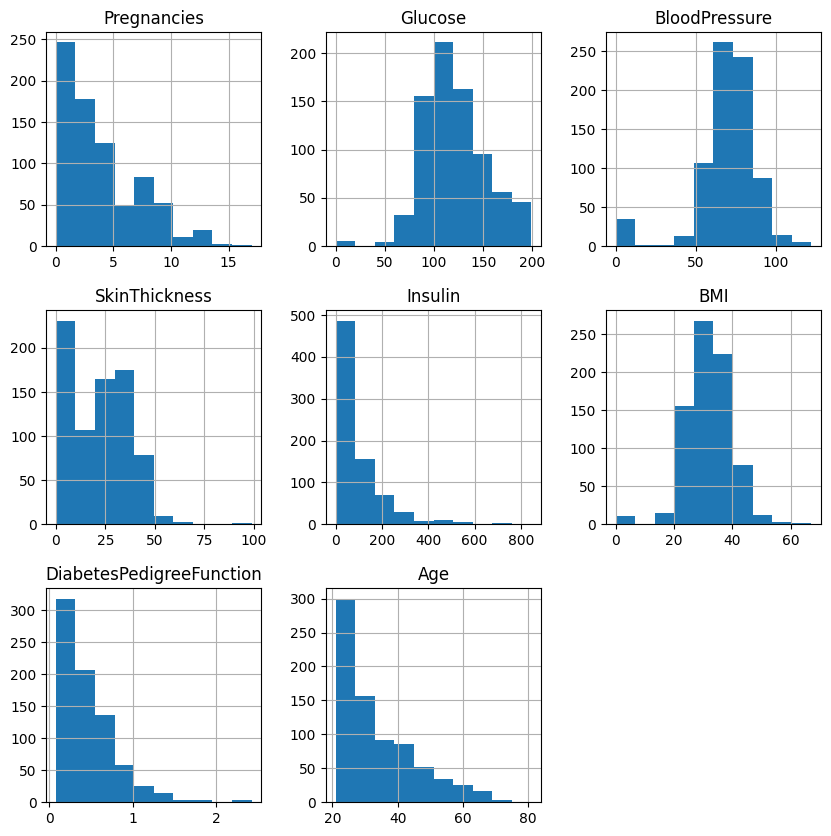

In [ ]:
selected_features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
df[selected_features].hist(figsize=(10, 10))
plt.show()

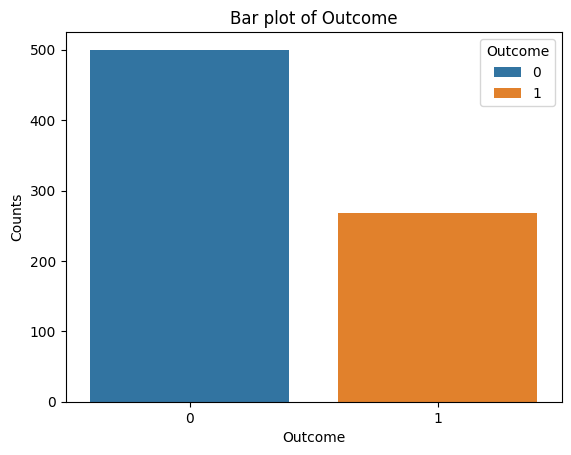

In [ ]:
sns.countplot(x="Outcome",data=df,hue="Outcome")
plt.title("Bar plot of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.show()

#Αξιολόγηση ποιότητας τον δεδομένων


Θεωρώ ότι η ποιότητα των δεδομένων είναι κακή διότι:
*   Σε κάποια χαρακτηριστικά (BMI,Insulin,Clucose,Blood Preasure,Skin Thickness) παρατηρούνται αρκετές μηδενικές τιμές.Αυτό υποδεικνύει είτε λανθασμένα καταγεγραμένα δεδομένα είτε ελλειπείς μετρήσεις.Αυτό μπορεί να δημιουργήσει πρόβλημα μετέπειτα στην εκπαίδευση του μοντέλου.
*  Κάποιες τιμές φαίνονται μη ρελιστικές, όπως οι εγκυμοσύνες,με αποτέλεσμα να επιρεαστεί αργότερα η ορθή  πρόβλεψη αποτελεσμάτων.
* Ακόμα για παράδειγμα στο ιστόγραμμα της ηλικίας βλέπουμε ότι έχουμε μικρή διασπόρα,αυτό είναι ένα ακόμα γεγονός που μπορεί να προκαλέσει πρόβλημα στην πρόβλεψη των αποτελεσμάτων και ειδικότερα στην κατηγορία των άνθρωπων μεγάλης ηλικίας στην όποια δεν έχει εκπαιδευτεί καλα το μοντέλο.





#Κατανομή της μεταβητής Age


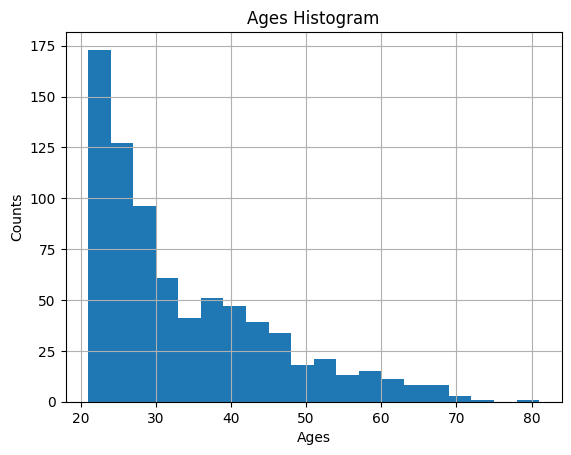

In [ ]:
df[selected_features[7]].hist(bins=20)
plt.title("Ages Histogram")
plt.xlabel("Ages")
plt.ylabel("Counts")
plt.show()

#Αξιολόγηση μεταβλητής Age
Με βάση το ιστόγραμμα της κατανομής Age, παρατηρούμε ότι η κατανόμη δεν είναι συμμετρική και θα μπορούσαμε να πούμε ότι ακολουθεί μια εκθετική κατανομή (α^χ) με βάση 0<α<1 και μετατοπισμένη προς τα δεξιά.Συνεπώς,οι περισσότερες τιμές συγκεντρώνονται στις νεαρές ηλικίες,κάνοντας το μοντέλο μη-αξιόπιστο στις προβλεψεις του για τους ηλικιωμένους, ακόμη και αν πετύχει ικανοποιητική ακρίβεια κατά την εκπαίδευση.



#Σχέση γλυκόζη και πιθανή εμφάνιση διαβήτη


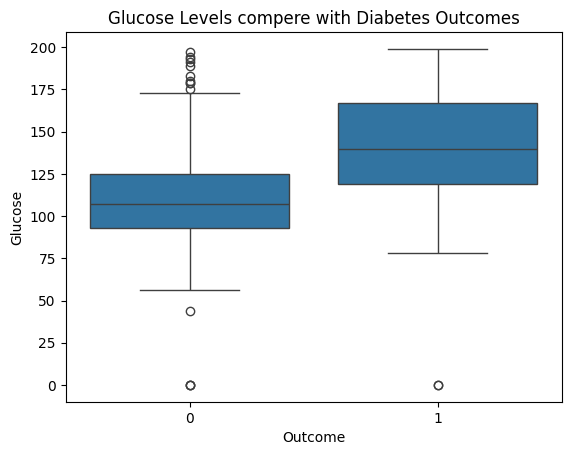

In [ ]:
sns.boxplot(x="Outcome", y="Glucose",data=df )
plt.title("Glucose Levels compere with Diabetes Outcomes")
plt.show()

In [ ]:
correlation_Glucose_Outcome = df.corr()["Glucose"]["Outcome"]
print(f"The correlation between Glucose and Outcome is: {correlation_Glucose_Outcome}")

The correlation between Glucose and Outcome is: 0.46658139830687373


#Συμπέρασμα
Σε πρώτη φάση βλέποντας την απεικόνιση απο το box plot,βλέπουμε ότι οι ασθένεις με διαβήτη έχουν ύψηλότερα επίπεδα γλυκόζης.Στην συννέχεια με την εύρεση της συσχέτισης(correlation)μεταξύ των δύο μεταβλητών που είναι θετική,επιβεβαιόνουμε την άποψη ότι άτομα με υψηλά επίπεδα γλυκόζης έχουν πιθανότητες να εμφανίσουν διαβήτη.

#Δημοιουργία Numpy Arrays

In [ ]:
x=df.drop("Outcome",axis=1).values
y=df["Outcome"].values

#Χωρισμός των δεδομένων σε train και validation set (70-30)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Εμφάνιση του πλήθους των Παραδειγμάτων traing-validatation

In [ ]:
print(f"Training examples:{len(x_train)}")
print(f"validation examples:{len(x_test)}")

Training examples:537
validation examples:231


#Εκπαίδευση Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000,random_state=0)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

#Πρόβλεψη της εξαρτημένης μεταβλητής

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

#Υπολογισμός Ακίβειας


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.7792207792207793


#Αξιολόγιση Αποτελεσμάτων

Παρατηρόυμε ότι το μοντέλο έχει ακρίβεια 0,78.Αυτό σημαίνει ότι σε κάποιες περιπτώσεις ένω ασθενής δεν είχε διαβήτη το μοντέλο έβγαλε λανθασμένα οτι έχει(False Positive).


Στην συγκεκριμένη περίπτώση όπου το μοντέλο μας κάνει προβλέψεις για μια ασθένια είναι προτιμότερο να προβλέψει ότι κάποιος είναι διαβητικός και έπειτα από περεταίρω πιο εξιδικευμένες εξετάσεις να αποδειχθεί ότι δεν είναι, παρά να μην καταφέρει να εντοπίσει έναν πραγματικό διαβητικό όπου η λανθασμένη πρόβλεψει έχει μεγάλο αντίκτυπο στην ζωη του ασθενή.

#Πως δουλεύει ο ταξινομητής για τις Ηλικιες

In [ ]:
age_groups = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])
df['AgeGroup'] = age_groups

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 9), (768,))

In [ ]:
feature_columns = df.drop(columns=['Outcome', 'AgeGroup']).columns
validation_df = pd.DataFrame(x_train, columns=feature_columns)
validation_df['Outcome'] = pd.Series(y_train, index=validation_df.index)
validation_df['Predicted'] = pd.Series(model.predict(x_train), index=validation_df.index)

display(validation_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
0,0.0,151.0,90.0,46.0,0.0,42.1,0.371,21.0,1,1
1,1.0,83.0,68.0,0.0,0.0,18.2,0.624,27.0,0,0
2,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0,0
3,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,1,1
4,0.0,123.0,72.0,0.0,0.0,36.3,0.258,52.0,1,0


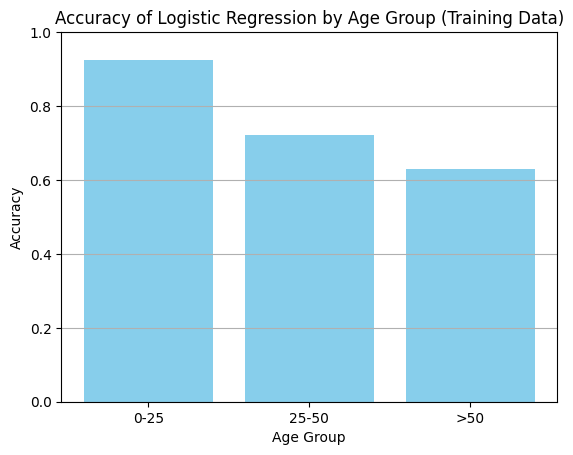

In [ ]:
# Ensure 'AgeGroup' column is in validation_df
validation_df['AgeGroup'] = pd.cut(validation_df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'], right=False)

accuracy_by_age_group = validation_df.groupby('AgeGroup', observed=True).apply(
    lambda group: accuracy_score(group['Outcome'], group['Predicted']), include_groups=False
)

plt.bar(accuracy_by_age_group.index, accuracy_by_age_group.values, color='skyblue')
plt.title('Accuracy of Logistic Regression by Age Group (Training Data)')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Ο Ταξινομητής φαίνεται να έχει καλή απόδοση στις ηλικίες 0-25 και ανω των 50.Ωστόσο,φαίνεται να μην λειτουργι καλά στις ενδιάμεσες ηλικίες 25-50.Αυτό μπορεί να οφείλεται στην ανεπάρκεια δεδομένων εκπαίδευσης για αυτή την ηλική ομάδα.

#Επαναλήψεις με διαφορετικά seed


In [ ]:
accuracies = []
kx=df.drop(["Outcome", "AgeGroup"], axis=1).values
ky=df["Outcome"].values

scaler = StandardScaler()
kx_scaled = scaler.fit_transform(kx)

for seed in range(10):
    kx_train, kx_test, ky_train, ky_test = train_test_split(kx_scaled, ky, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(kx_train, ky_train)
    y_pred = model.predict(kx_test)
    accuracies.append(accuracy_score(ky_test, y_pred))

print(f"Accuracies: {accuracies}")

Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]


In [ ]:
accuracies = []


scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(["Outcome", "AgeGroup"], axis=1).values)

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Accuracies: {accuracies}")

Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]


#Υπολογισμός μέσου όρου και τυπικής απόκλησης

In [ ]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean accuracy: {mean_accuracy}, Standard deviation: {std_accuracy}")

Mean accuracy: 0.7735930735930736, Standard deviation: 0.019364735278220815


#Ερώτημα 10

In [ ]:
model=LogisticRegression(max_iter=2000)
model.fit(kx_scaled,ky)

LogisticRegression(max_iter=2000)

In [ ]:
coefficients=model.coef_[0]
attributes_names=df.drop(["Outcome","AgeGroup"],axis=1).columns
coef_df=pd.DataFrame({"Attributes":attributes_names,"Coefficient":coefficients})
display(coef_df)

,Attributes,Coefficient
0,Pregnancies,0.408804
1,Glucose,1.107349
2,BloodPressure,-0.250794
3,SkinThickness,0.009010
4,Insulin,-0.130753
5,BMI,0.696354
6,DiabetesPedigreeFunction,0.308889
7,Age,0.176551


In [ ]:
coef_df["Abs_Coefficient"]=coef_df["Coefficient"].abs()
coef_df_sorted=coef_df.sort_values(by="Abs_Coefficient",ascending=False)
print("the most important coefficients for the prediction is:")
print(coef_df_sorted.head(3))

the most important coefficients for the prediction is:
    Attributes  Coefficient  Abs_Coefficient
1      Glucose     1.107349         1.107349
5          BMI     0.696354         0.696354
0  Pregnancies     0.408804         0.408804


#Μέρος 2-Γραμμική Παλινδρόμηση

#Φόρτωση Δεδομένων


In [ ]:
df=pd.read_csv("diabetes.csv")
input_df=df[["Pregnancies","BloodPressure","BMI","Age"]]
x=input_df.to_numpy()
y=df["Insulin"].to_numpy()

#Χωρισμός Δεδομένων σε training-velidation sets (70-30)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


#Χρήση γραμμικής παλινδρόμησης και εύρεσης MSE,MAE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
modelo=LinearRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")

Mean Squared Error:10883.73731967615
Mean Absolute Error:79.82886812357145


Η μετρική MAE είναι η καταλλήλότερη, καθώς κεφράζει άμεσα την μέση τιμή της απόκλισης της πρόβλεψης απο την πραγματική τιμή,δίχως να επηρεάζεται υπερβολικά απο ακραιές τιμές.Είναι πιο εύκολα ερμηνεύσιμη και δίνει καλύτερη εικόνα της πρακτικής απόδοσης του μοντέλου.

#Δοκιμές με διαφορετικά βάρη του λ

In [ ]:
l=[0.2,0.4,0.6,0.8,1.0] #οι τιμές που θέλουμε να πάρει το λ
results=[]
for l in l:
  model=Lasso(alpha=l,max_iter=1000)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mae=mean_absolute_error(y_test,y_pred)
  results.append({"l":l,"MAE":round(mae,2)})
results_df=pd.DataFrame(results)
print(results_df)

     l    MAE
0  0.2  79.83
1  0.4  79.82
2  0.6  79.82
3  0.8  79.82
4  1.0  79.82


#Εύρεση του χαρακτηριστικού με τον μικρότερο συντελεστή

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
modelo=LinearRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
first_mae=mean_absolute_error(y_test,y_pred)
features=["Pregnancies","BloodPressure","BMI","Age"]
coefficients=modelo.coef_
min_index=np.argmin(np.abs(coefficients))
feature_to_remove=features[min_index]
print(f"The feature with the smallest coefficient is: {feature_to_remove}")



The feature with the smallest coefficient is: BloodPressure


#Δημιουργία νέου Dataframe χωρίς το χαρακτηριστικό BloodPressure

In [ ]:
df=pd.read_csv("diabetes.csv")
input_df=df[["Pregnancies","BMI","Age"]]
x=input_df.to_numpy()
y=df["Insulin"].to_numpy()

#Χωρισμός δεδομένων και ξανά γραμμική παλινδρόμηση

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
modelo=LinearRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
second_mae=mean_absolute_error(y_test,y_pred)
print("first_mae:",first_mae)
print("second_mae:",second_mae)

first_mae: 79.82886812357145
second_mae: 80.15720706036602


Παρατηρούμε ότι οι δυο τιμές(παλία και καινούρια)του MAE δεν έχουν αλλάξει ιδιαίτερα,κάτι που περιμένα αφού αφερέσαμε το χαρακτηριστικό με τον μικρότερο συντελεστή.Ωστόσο έχουμε μια αύξηση στην νέα τιμή,όπου προέκυψε όταν αφερέσαμε το χαρακτηριστικό BloodPressure.Αυτό μας δίχνει ότι παρόλο που είχε μικρό συντελεστή βιηθούσε το μοντέλο μας.
